# Import Libraries

In [22]:
# basic data science stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# tensorflow/keras for modeling
import tensorflow as tf
from tensorflow.keras import models, layers, losses, utils, callbacks, preprocessing

# pickle for saving/loading
import pickle

# Load Data

In [23]:
with open('../Data/Cleaned/X_train.pickle', 'rb') as file:
    X_train = pickle.load(file)

with open('../Data/Cleaned/X_test.pickle', 'rb') as file:
    X_test = pickle.load(file)

with open('../Data/Cleaned/y_train.pickle', 'rb') as file:
    y_train = pickle.load(file)

with open('../Data/Cleaned/y_test.pickle', 'rb') as file:
    y_test = pickle.load(file)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14034, 150, 150, 3) (14034,) (3000, 150, 150, 3) (3000,)


# Helper Functions

In [21]:
def accuracy_line_plot(history, metric, validation_metric):
    """Create line plot comparing metrics for the training and validation sets over each epoch"""
    
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history[validation_metric], label = validation_metric)
    plt.title("Training and Testing Accuracy per Epoch")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

def load_evaluate_model(model_name, X, y, class_labels):
    """Load a model, evaluate accuracy, make predictions, create classification report, 
    and create confusion matrix heatmap"""
    
    # Load Model
    path = '../Models/' + model_name
    model = models.load_model(path)
    
    # Evaluate accuracy
    loss, acc = model.evaluate(X, y)
    print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
    
    # Make Predictions and create classification report
    y_pred = np.argmax(model.predict(X), axis = -1)
    print(classification_report(y, y_pred))
    
    # Create confusion Matrix
    cm = confusion_matrix(y, y_pred)
    
    # Create heatmap of confusion matrix
    sns.set_context('poster')
    fig, ax = plt.subplots(figsize = (15,10))
    sns.heatmap(cm, annot=True, fmt='.0f', ax = ax)
    ax.set_title('Predicted vs True Classes for {}'.format(model_name))
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    ax.set_xticklabels(labels=class_labels, rotation = 45)
    ax.set_yticklabels(labels=class_labels, rotation = 45)
    plt.tight_layout()
    plt.show() 
    
    
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Create Basic CNN

In [3]:
CNN_v1 = models.Sequential()
CNN_v1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v1.add(layers.MaxPooling2D((2, 2)))
CNN_v1.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v1.add(layers.MaxPooling2D((2, 2)))
CNN_v1.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v1.add(layers.MaxPooling2D((2, 2)))
CNN_v1.add(layers.Flatten())
CNN_v1.add(layers.Dense(64, activation='relu'))
CNN_v1.add(layers.Dense(6, activation='softmax'))

CNN_v1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

# Compile and Fit Basic CNN

In [4]:
CNN_v1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

In [5]:
results_CNN_v1 = CNN_v1.fit(
    X_train, 
    y_train,
    batch_size = 50,
    epochs = 10, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Epoch 1/10
281/281 - 17s - loss: 0.9602 - acc: 0.6314 - val_loss: 0.7248 - val_acc: 0.7290
Epoch 2/10
281/281 - 8s - loss: 0.6121 - acc: 0.7770 - val_loss: 0.6017 - val_acc: 0.7810
Epoch 3/10
281/281 - 8s - loss: 0.4870 - acc: 0.8244 - val_loss: 0.6479 - val_acc: 0.7547
Epoch 4/10
281/281 - 8s - loss: 0.3791 - acc: 0.8631 - val_loss: 0.5434 - val_acc: 0.8193
Epoch 5/10
281/281 - 8s - loss: 0.2693 - acc: 0.9074 - val_loss: 0.5750 - val_acc: 0.8130
Epoch 6/10
281/281 - 8s - loss: 0.1765 - acc: 0.9383 - val_loss: 0.6169 - val_acc: 0.8150
Epoch 7/10
281/281 - 8s - loss: 0.1290 - acc: 0.9563 - val_loss: 0.7672 - val_acc: 0.7933
Epoch 8/10
281/281 - 8s - loss: 0.0828 - acc: 0.9732 - val_loss: 0.8241 - val_acc: 0.8200
Epoch 9/10
281/281 - 8s - loss: 0.0626 - acc: 0.9815 - val_loss: 0.8517 - val_acc: 0.8147
Epoch 10/10
281/281 - 8s - loss: 0.0533 - acc: 0.9855 - val_loss: 0.9928 - val_acc: 0.7980


# CNN_v1 Evaluation - 20 Epochs, NO image augmentation

94/94 [==============================] - 2s 10ms/step - loss: 0.9928 - acc: 0.7980
Restored model, accuracy: 79.80%
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       437
           1       0.89      0.98      0.93       474
           2       0.82      0.67      0.74       553
           3       0.79      0.69      0.73       525
           4       0.73      0.89      0.80       510
           5       0.80      0.84      0.82       501

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



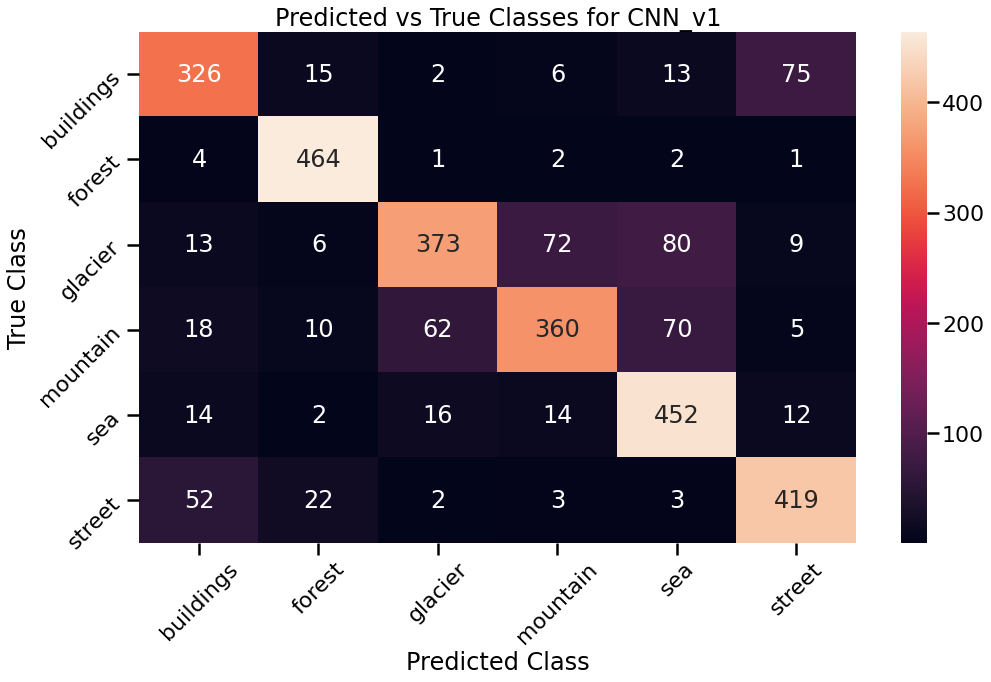

In [24]:
load_evaluate_model('CNN_v1', X_test, y_test, labels)

The training accuracy improved all the way up to 98.4% in Epoch 9 on the training set, however testing accuracy peaked at 82.6% in epoch 4.

Our model has trouble with the following:
1. Buildings being predicted as streets/streets being predicted as buildings
2. Glaciers being confused with mountains/mountains being predicted as glaciers
3. Glaciers and mountains being predicted as sea

Logically, all of these mistakes make sense. Buildings and streets have similar color schemes, and similar shapes since there are likely edges of buildings within the street pictures. Glaciers in many cases likely look like mountains made out of ice. It may seem weird that a mountain or glacier would look like the sea, but when you think about the colors/shapes/structures within the photos it starts to make sense. 

# Save Model

In [13]:
CNN_v1.save('../Models/CNN_v1')

INFO:tensorflow:Assets written to: ../Models/CNN_v1\assets


# Model Improvement

There are many ways to improve/tune a neural network, but to start I'd like to explore two of the biggest ones:
1. Use more data
2. Train for a larger number of epochs

Computer vision problems are notorious for requiring a large amount of data to create truly accurate models. Currently our training dataset is limited to ~14k images, which is ~2300 per class. This lack of data may be limiting our models potential. 

While we can't go out and collect additional data, we can use some tricks to generate additional data from our current dataset.

# Image Augmentation

Below I will use the Keras ImageDataGenerator class to perform image augmentation on this dataset. While image augmentation can be useful for making your model more robust to different image types, we need to be sure that we are creating additional relevant information, and not additional irrelevant information. When selecting different augmentation methods it is important to have justification for why we are using that method, and why we are selecting the specific parameter value for that method. In some cases, I may test multiple models with different levels of augmented data to see which works better.

1. Rotation Range: I've decided to use rotation but only to a mild degree (up to 20 degrees). This is because most of our images are of environments that are unlikely to be pictured upside down or rotated very much at all. For example, when have you ever seen a picture of a mountain or a building on its side? The small rotation amount should help deal with pictures that are taken at slightly-off rotations.

2. Width_shift_range: I've decided to use a width_shift_range of somewhere between 0.2 and 0.4. I think this may help with scenes that have the mountain/building/street/etc not directly in the middle of the image.

4. Height_shift_range: I'm not sure whether to use this or not since I think it may cut out the peak of the mountains/glaciers/buildings. I'll test values between 0.2 and 0.4.

5. Horizontal_flip: I'm using horizontal shift but not vertical flip because flipping a mountain or building or glacier upside down does not really make sense.

6. Brightness_range: After some initial testing, brightness_range will not be used since it was completely ruining the predictions of the model.

7. Zoom_range: I'll test zoom ranges of between 0.2 and 0.4.

8. Shear_range: I'll test shear ranges of between 0.2 and 0.4.

In [18]:
datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2  
)

In [19]:
datagen.fit(X_train)

In [21]:
CNN_v2 = models.Sequential()
CNN_v2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v2.add(layers.MaxPooling2D((2, 2)))
CNN_v2.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v2.add(layers.MaxPooling2D((2, 2)))
CNN_v2.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v2.add(layers.MaxPooling2D((2, 2)))
CNN_v2.add(layers.Flatten())
CNN_v2.add(layers.Dense(64, activation='relu'))
CNN_v2.add(layers.Dense(6, activation='softmax'))

CNN_v2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)            

In [23]:
CNN_v2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

In [24]:
results_CNN_v2 = CNN_v2.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    batch_size = 32,
    epochs = 20, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Epoch 1/20
439/439 - 45s - loss: 1.0163 - acc: 0.6033 - val_loss: 0.8502 - val_acc: 0.6977
Epoch 2/20
439/439 - 45s - loss: 0.7368 - acc: 0.7271 - val_loss: 0.7096 - val_acc: 0.7510
Epoch 3/20
439/439 - 44s - loss: 0.6128 - acc: 0.7768 - val_loss: 0.5913 - val_acc: 0.7857
Epoch 4/20
439/439 - 44s - loss: 0.5462 - acc: 0.8022 - val_loss: 0.4747 - val_acc: 0.8373
Epoch 5/20
439/439 - 44s - loss: 0.4882 - acc: 0.8243 - val_loss: 0.5149 - val_acc: 0.8217
Epoch 6/20
439/439 - 46s - loss: 0.4670 - acc: 0.8322 - val_loss: 0.4292 - val_acc: 0.8527
Epoch 7/20
439/439 - 45s - loss: 0.4337 - acc: 0.8430 - val_loss: 0.4499 - val_acc: 0.8487
Epoch 8/20
439/439 - 44s - loss: 0.4183 - acc: 0.8512 - val_loss: 0.4270 - val_acc: 0.8557
Epoch 9/20
439/439 - 44s - loss: 0.3929 - acc: 0.8582 - val_loss: 0.4336 - val_acc: 0.8523
Epoch 10/20
439/439 - 44s - loss: 0.3833 - acc: 0.8620 - val_loss: 0.3963 - val_acc: 0.8727
Epoch 11/20
439/439 - 44s - loss: 0.3611 - acc: 0.8677 - val_loss: 0.4784 - val_acc: 0.83

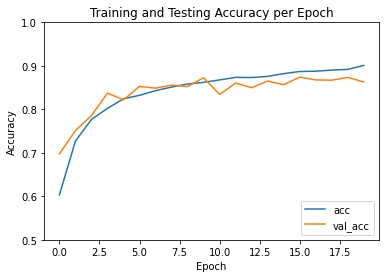

In [29]:
accuracy_line_plot(results_CNN_v2, 'acc', 'val_acc')

# CNN_v2 Evaluation - 20 epochs, low levels of image augmentation, NO height shift or rotation

94/94 [==============================] - 1s 9ms/step - loss: 0.4169 - acc: 0.8630
Restored model, accuracy: 86.30%
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       437
           1       0.95      0.96      0.96       474
           2       0.82      0.82      0.82       553
           3       0.82      0.82      0.82       525
           4       0.90      0.85      0.87       510
           5       0.86      0.90      0.88       501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



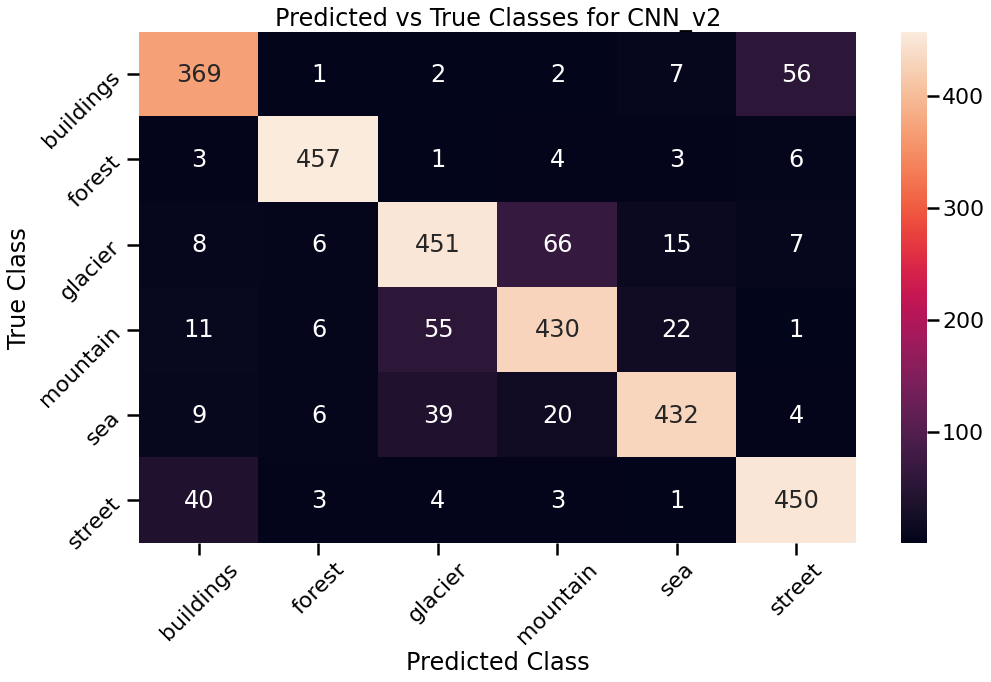

In [25]:
load_evaluate_model('CNN_v2', X_test, y_test, labels)

# Evaluation of First Image Augmentation Training Round

After applying some simple image augmentation methods and training for 20 epochs we were able to improve the test_set accuracy from ~80% to ~87%! At the end of 20 epochs we were still seing improvement in the training accuracy so if we trained for more epochs we may have seen even more improvement!

When looking at the confusion matrix, we seem to have mainly solved the problem of confusing pictures of glaciers/mountains with the sea.

Let's see if instituting additional image augmentation techniques or more severe image augmentation techniques will help with our accuracy.

# Image Augmentation Round 2

In [32]:
datagen = preprocessing.image.ImageDataGenerator(
    height_shift_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
)

datagen.fit(X_train)

CNN_v3 = models.Sequential()
CNN_v3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v3.add(layers.MaxPooling2D((2, 2)))
CNN_v3.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v3.add(layers.MaxPooling2D((2, 2)))
CNN_v3.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v3.add(layers.MaxPooling2D((2, 2)))
CNN_v3.add(layers.Flatten())
CNN_v3.add(layers.Dense(64, activation='relu'))
CNN_v3.add(layers.Dense(6, activation='softmax'))

CNN_v3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36992)            

In [33]:
CNN_v3.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

results_CNN_v3 = CNN_v3.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    batch_size = 32,
    epochs = 20, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Epoch 1/20
439/439 - 46s - loss: 1.0966 - acc: 0.5576 - val_loss: 0.7887 - val_acc: 0.6963
Epoch 2/20
439/439 - 45s - loss: 0.8100 - acc: 0.6942 - val_loss: 0.6958 - val_acc: 0.7460
Epoch 3/20
439/439 - 45s - loss: 0.7009 - acc: 0.7424 - val_loss: 0.5975 - val_acc: 0.7847
Epoch 4/20
439/439 - 45s - loss: 0.6160 - acc: 0.7758 - val_loss: 0.6795 - val_acc: 0.7420
Epoch 5/20
439/439 - 45s - loss: 0.5734 - acc: 0.7902 - val_loss: 0.4760 - val_acc: 0.8300
Epoch 6/20
439/439 - 47s - loss: 0.5276 - acc: 0.8065 - val_loss: 0.4945 - val_acc: 0.8123
Epoch 7/20
439/439 - 46s - loss: 0.5010 - acc: 0.8207 - val_loss: 0.4696 - val_acc: 0.8383
Epoch 8/20
439/439 - 45s - loss: 0.5015 - acc: 0.8228 - val_loss: 0.4377 - val_acc: 0.8457
Epoch 9/20
439/439 - 45s - loss: 0.4616 - acc: 0.8330 - val_loss: 0.4626 - val_acc: 0.8350
Epoch 10/20
439/439 - 45s - loss: 0.4495 - acc: 0.8371 - val_loss: 0.4052 - val_acc: 0.8573
Epoch 11/20
439/439 - 45s - loss: 0.4301 - acc: 0.8437 - val_loss: 0.4613 - val_acc: 0.83

# CNN_v3 Evaluation - 20 epochs, low levels of image augmentation, INCLUDING height shift and rotation

94/94 [==============================] - 1s 9ms/step - loss: 0.4178 - acc: 0.8490
Restored model, accuracy: 84.90%
              precision    recall  f1-score   support

           0       0.70      0.94      0.81       437
           1       0.95      0.98      0.96       474
           2       0.81      0.84      0.82       553
           3       0.84      0.77      0.80       525
           4       0.92      0.82      0.87       510
           5       0.92      0.76      0.83       501

    accuracy                           0.85      3000
   macro avg       0.86      0.85      0.85      3000
weighted avg       0.86      0.85      0.85      3000



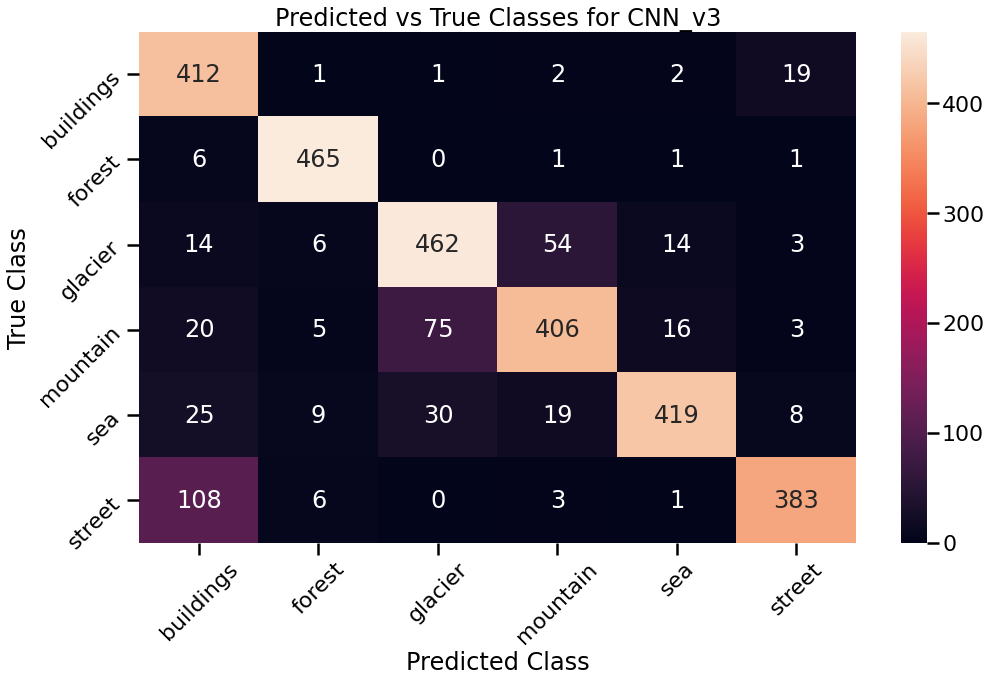

In [26]:
load_evaluate_model('CNN_v3', X_test, y_test, labels)

# Evaluation of Second Image Augmentation Training Round

This round I also included heigh shift and rotation augmentation, but it didn't seem to have a positive impact on the results.

Let's save these two models and then try some training with more drastic image augmentation.

# Save Models

In [36]:
CNN_v2.save('../Models/CNN_v2')
CNN_v3.save('../Models/CNN_v3')

INFO:tensorflow:Assets written to: ../Models/CNN_v2\assets
INFO:tensorflow:Assets written to: ../Models/CNN_v3\assets


# Additional Image Augmentation Testing

Let's test the same setups, but with higher parameter values for each image augmentation technique.

In [3]:
datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.4,
    horizontal_flip=True,
    zoom_range=0.4,
    shear_range=0.4  
)

datagen.fit(X_train)

CNN_v4 = models.Sequential()
CNN_v4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v4.add(layers.MaxPooling2D((2, 2)))
CNN_v4.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v4.add(layers.MaxPooling2D((2, 2)))
CNN_v4.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v4.add(layers.MaxPooling2D((2, 2)))
CNN_v4.add(layers.Flatten())
CNN_v4.add(layers.Dense(64, activation='relu'))
CNN_v4.add(layers.Dense(6, activation='softmax'))

CNN_v4.summary()

CNN_v4.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

results_CNN_v4 = CNN_v4.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    batch_size = 32,
    epochs = 20, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

# CNN_v4 Evaluation - 20 Epochs, High levels of image augmentation, NO height shift or rotation

94/94 [==============================] - 1s 9ms/step - loss: 0.3490 - acc: 0.8740
Restored model, accuracy: 87.40%
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       437
           1       0.96      0.98      0.97       474
           2       0.83      0.82      0.82       553
           3       0.81      0.82      0.82       525
           4       0.90      0.87      0.88       510
           5       0.88      0.89      0.89       501

    accuracy                           0.87      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.87      0.87      0.87      3000



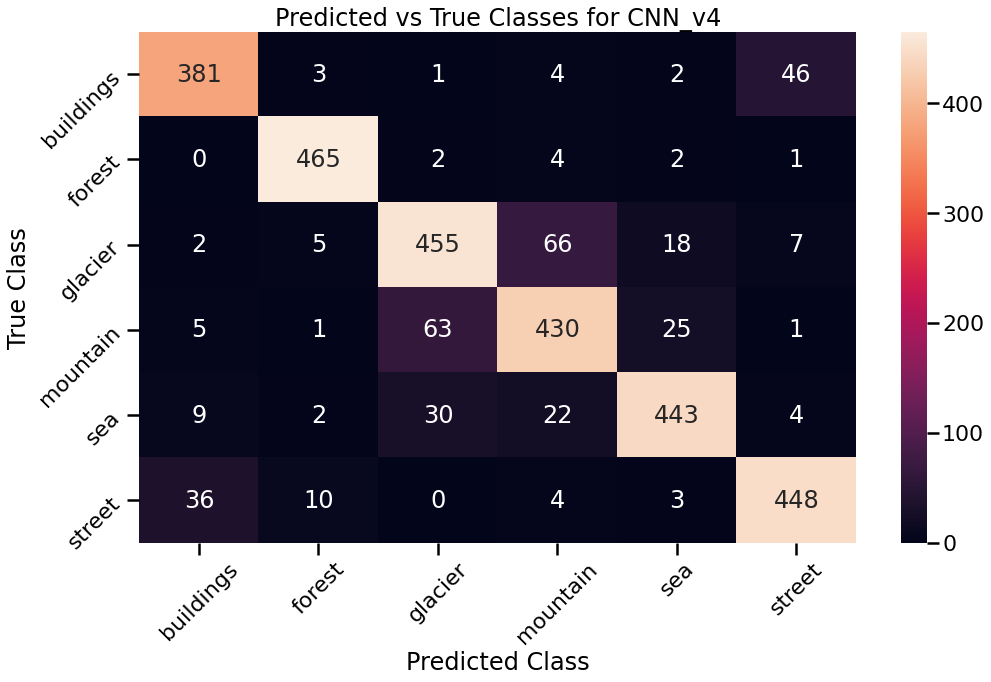

In [27]:
load_evaluate_model('CNN_v4', X_test, y_test, labels)

In [4]:
datagen = preprocessing.image.ImageDataGenerator(
    height_shift_range=0.4,
    rotation_range=0.4,
    width_shift_range=0.4,
    horizontal_flip=True,
    zoom_range=0.4,
    shear_range=0.4  
)

datagen.fit(X_train)

CNN_v5 = models.Sequential()
CNN_v5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v5.add(layers.MaxPooling2D((2, 2)))
CNN_v5.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v5.add(layers.MaxPooling2D((2, 2)))
CNN_v5.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v5.add(layers.MaxPooling2D((2, 2)))
CNN_v5.add(layers.Flatten())
CNN_v5.add(layers.Dense(64, activation='relu'))
CNN_v5.add(layers.Dense(6, activation='softmax'))

CNN_v5.summary()

CNN_v5.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

results_CNN_v5 = CNN_v5.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    batch_size = 32,
    epochs = 20, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

# CNN_v5 Evaluation - 20 epochs, High levels of image augmentation, INCLUDING height shift and rotation

94/94 [==============================] - 1s 9ms/step - loss: 0.4417 - acc: 0.8413
Restored model, accuracy: 84.13%
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       437
           1       0.97      0.98      0.98       474
           2       0.89      0.63      0.74       553
           3       0.69      0.90      0.78       525
           4       0.92      0.85      0.88       510
           5       0.88      0.84      0.86       501

    accuracy                           0.84      3000
   macro avg       0.85      0.85      0.84      3000
weighted avg       0.85      0.84      0.84      3000



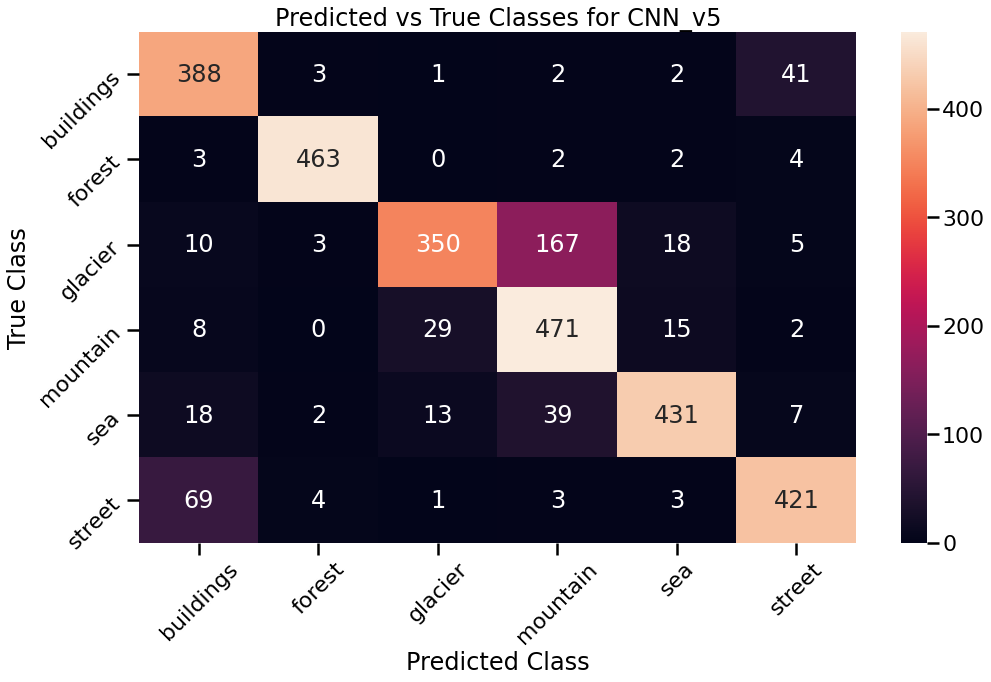

In [28]:
load_evaluate_model('CNN_v5', X_test, y_test, labels)

# Save Models

In [5]:
CNN_v4.save('../Models/CNN_v4')
CNN_v5.save('../Models/CNN_v5')

INFO:tensorflow:Assets written to: ../Models/CNN_v4\assets
INFO:tensorflow:Assets written to: ../Models/CNN_v5\assets


# 100 Epochs - Low levels of image augmentation

Let's train some of our most successful models again, but with 100 epochs.

This is the one with low levels of image augmentation, CNN_v2.

In [9]:
datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2  
)

datagen.fit(X_train)

CNN_v6 = models.Sequential()
CNN_v6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v6.add(layers.MaxPooling2D((2, 2)))
CNN_v6.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v6.add(layers.MaxPooling2D((2, 2)))
CNN_v6.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v6.add(layers.MaxPooling2D((2, 2)))
CNN_v6.add(layers.Flatten())
CNN_v6.add(layers.Dense(64, activation='relu'))
CNN_v6.add(layers.Dense(6, activation='softmax'))

CNN_v6.summary()

CNN_v6.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

checkpoints = callbacks.ModelCheckpoint(
    filepath='../Models/Checkpoints/CNN_v6/{epoch:03d}-{val_loss:.2f}',
    save_weights_only=True,
    monitor='val_loss'
)

my_callbacks = [checkpoints]

results_CNN_v6 = CNN_v6.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    callbacks = my_callbacks,
    batch_size = 32,
    epochs = 100, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

Epoch 73/100
439/439 - 48s - loss: 0.1218 - acc: 0.9545 - val_loss: 0.6264 - val_acc: 0.8647
Epoch 74/100
439/439 - 48s - loss: 0.1319 - acc: 0.9524 - val_loss: 0.5550 - val_acc: 0.8727
Epoch 75/100
439/439 - 47s - loss: 0.1214 - acc: 0.9558 - val_loss: 0.5746 - val_acc: 0.8730
Epoch 76/100
439/439 - 47s - loss: 0.1229 - acc: 0.9555 - val_loss: 0.7091 - val_acc: 0.8590
Epoch 77/100
439/439 - 47s - loss: 0.1415 - acc: 0.9501 - val_loss: 0.6562 - val_acc: 0.8617
Epoch 78/100
439/439 - 47s - loss: 0.1195 - acc: 0.9566 - val_loss: 0.6752 - val_acc: 0.8547
Epoch 79/100
439/439 - 47s - loss: 0.1229 - acc: 0.9537 - val_loss: 0.6110 - val_acc: 0.8657
Epoch 80/100
439/439 - 47s - loss: 0.1121 - acc: 0.9585 - val_loss: 0.6761 - val_acc: 0.8590
Epoch 81/100
439/439 - 47s - loss: 0.1232 - acc: 0.9553 - val_loss: 0.6452 - val_acc: 0.8490
Epoch 82/100
439/439 - 47s - loss: 0.1280 - acc: 0.9549 - val_loss: 0.5681 - val_acc: 0.8720
Epoch 83/100
439/439 - 47s - loss: 0.1156 - acc: 0.9588 - val_loss: 0.

# CNN_v6 Evaluation - 100 Epochs, low levels of image augmentation, NO height shift or rotation

94/94 [==============================] - 1s 9ms/step - loss: 0.7086 - acc: 0.8650
Restored model, accuracy: 86.50%
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       437
           1       0.99      0.97      0.98       474
           2       0.86      0.75      0.80       553
           3       0.81      0.82      0.81       525
           4       0.88      0.89      0.89       510
           5       0.83      0.93      0.88       501

    accuracy                           0.86      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.86      0.86      3000



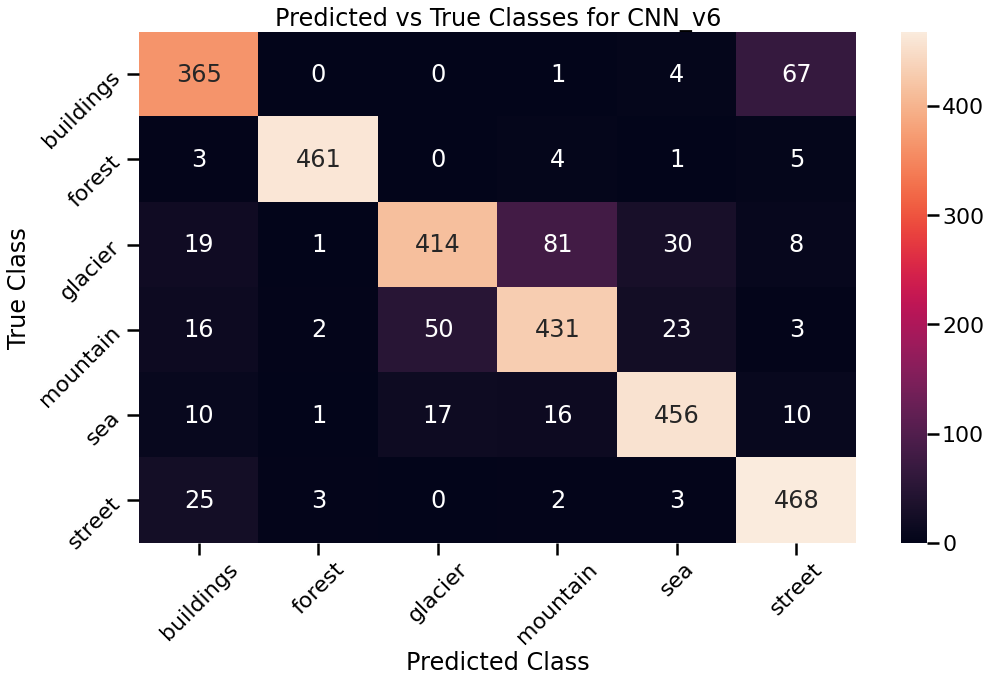

In [29]:
load_evaluate_model('CNN_v6', X_test, y_test, labels)

In [13]:
CNN_v6.save('../Models/CNN_v6')

INFO:tensorflow:Assets written to: ../Models/CNN_v6\assets


# Average Pooling Test

So far we have been using Max Pooling layers after each convolution layer, let's see if average pooling would improve our model.

In [11]:
datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2  
)

datagen.fit(X_train)

CNN_v7 = models.Sequential()
CNN_v7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v7.add(layers.AveragePooling2D((2, 2)))
CNN_v7.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v7.add(layers.AveragePooling2D((2, 2)))
CNN_v7.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v7.add(layers.AveragePooling2D((2, 2)))
CNN_v7.add(layers.Flatten())
CNN_v7.add(layers.Dense(64, activation='relu'))
CNN_v7.add(layers.Dense(6, activation='softmax'))

CNN_v7.summary()

CNN_v7.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

my_callbacks = [checkpoints]

results_CNN_v7 = CNN_v7.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    batch_size = 32,
    epochs = 20, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
average_pooling2d_2 (Average (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)            

In [14]:
CNN_v7.save('../Models/CNN_v7')

INFO:tensorflow:Assets written to: ../Models/CNN_v7\assets


# Evaluate CNN_v7 - 20 Epochs, Average Pooling, low levels of image augmentation, NO height shift or rotation

It appears that average pooling did not improve our model.

94/94 [==============================] - 1s 9ms/step - loss: 0.4087 - acc: 0.8520
Restored model, accuracy: 85.20%
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       437
           1       0.97      0.96      0.97       474
           2       0.82      0.80      0.81       553
           3       0.83      0.74      0.78       525
           4       0.84      0.87      0.86       510
           5       0.84      0.91      0.87       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



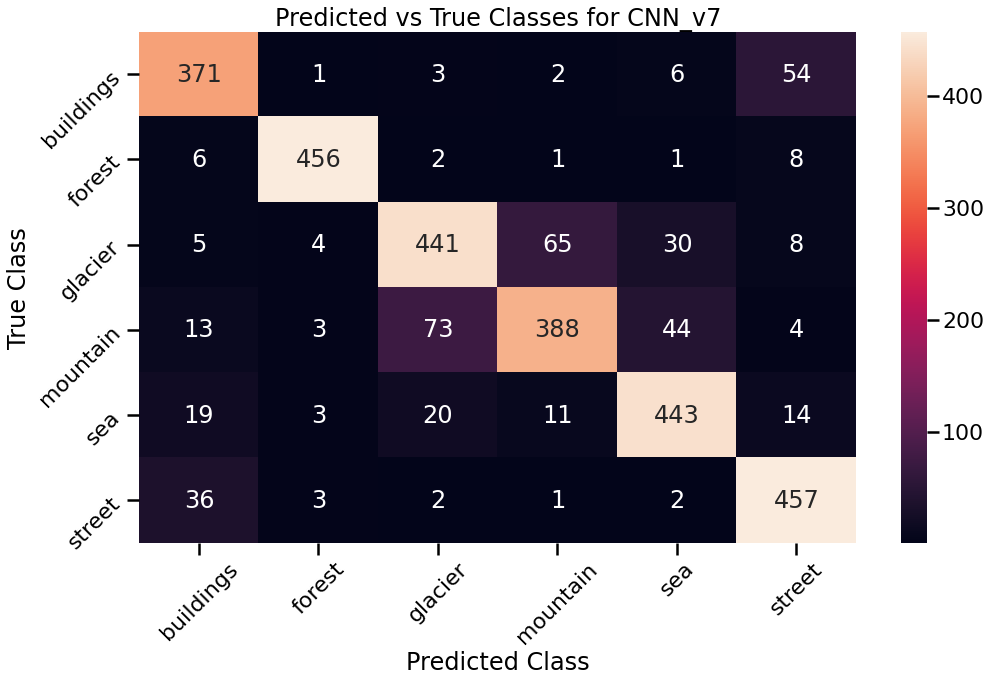

In [30]:
load_evaluate_model('CNN_v7', X_test, y_test, labels)

# 100 Epochs Training - High levels of image augmentation

Let's retrain CNN_v4 but with 100 epochs

In [6]:
datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.4,
    horizontal_flip=True,
    zoom_range=0.4,
    shear_range=0.4  
)

datagen.fit(X_train)

CNN_v8 = models.Sequential()
CNN_v8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v8.add(layers.MaxPooling2D((2, 2)))
CNN_v8.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v8.add(layers.MaxPooling2D((2, 2)))
CNN_v8.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v8.add(layers.MaxPooling2D((2, 2)))
CNN_v8.add(layers.Flatten())
CNN_v8.add(layers.Dense(64, activation='relu'))
CNN_v8.add(layers.Dense(6, activation='softmax'))

CNN_v8.summary()

checkpoints = callbacks.ModelCheckpoint(
    filepath='../Models/Checkpoints/CNN_v8/{epoch:03d}-{val_loss:.2f}',
    save_weights_only=True,
    monitor='val_loss'
)

my_callbacks = [checkpoints]

CNN_v8.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

results_CNN_v8 = CNN_v8.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    callbacks = my_callbacks,
    batch_size = 32,
    epochs = 100, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

Epoch 73/100
439/439 - 45s - loss: 0.2258 - acc: 0.9206 - val_loss: 0.4157 - val_acc: 0.8807
Epoch 74/100
439/439 - 45s - loss: 0.2344 - acc: 0.9119 - val_loss: 0.4333 - val_acc: 0.8730
Epoch 75/100
439/439 - 45s - loss: 0.2184 - acc: 0.9175 - val_loss: 0.4101 - val_acc: 0.8873
Epoch 76/100
439/439 - 45s - loss: 0.2266 - acc: 0.9141 - val_loss: 0.4355 - val_acc: 0.8900
Epoch 77/100
439/439 - 45s - loss: 0.2300 - acc: 0.9136 - val_loss: 0.4852 - val_acc: 0.8537
Epoch 78/100
439/439 - 45s - loss: 0.2347 - acc: 0.9119 - val_loss: 0.4100 - val_acc: 0.8847
Epoch 79/100
439/439 - 45s - loss: 0.2215 - acc: 0.9163 - val_loss: 0.4205 - val_acc: 0.8740
Epoch 80/100
439/439 - 45s - loss: 0.2318 - acc: 0.9136 - val_loss: 0.4248 - val_acc: 0.8810
Epoch 81/100
439/439 - 45s - loss: 0.2261 - acc: 0.9167 - val_loss: 0.4188 - val_acc: 0.8737
Epoch 82/100
439/439 - 48s - loss: 0.2194 - acc: 0.9173 - val_loss: 0.4508 - val_acc: 0.8750
Epoch 83/100
439/439 - 45s - loss: 0.2183 - acc: 0.9189 - val_loss: 0.

In [7]:
CNN_v8.save('../Models/CNN_v8')

INFO:tensorflow:Assets written to: ../Models/CNN_v8\assets


# Evaluate CNN_v8 - 100 Epochs, high Levels of Image Augmentation, NO height shift or rotation

94/94 [==============================] - 1s 9ms/step - loss: 0.4597 - acc: 0.8747
Restored model, accuracy: 87.47%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       437
           1       0.96      0.97      0.97       474
           2       0.88      0.76      0.82       553
           3       0.79      0.86      0.82       525
           4       0.88      0.93      0.90       510
           5       0.90      0.86      0.88       501

    accuracy                           0.87      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.87      0.87      3000



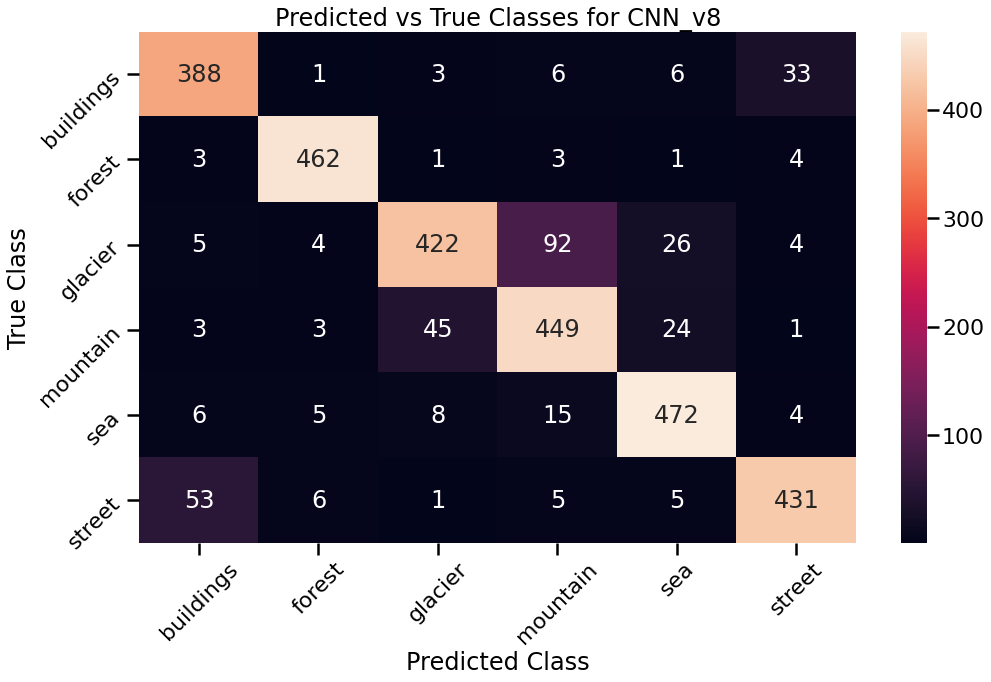

In [31]:
load_evaluate_model('CNN_v8', X_test, y_test, labels)

# Testing channel shift augmentation

In [6]:
datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.4,
    horizontal_flip=True,
    zoom_range=0.4,
    shear_range=0.4,
    channel_shift_range=0.4
)

datagen.fit(X_train)

CNN_v9 = models.Sequential()
CNN_v9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
CNN_v9.add(layers.MaxPooling2D((2, 2)))
CNN_v9.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_v9.add(layers.MaxPooling2D((2, 2)))
CNN_v9.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_v9.add(layers.MaxPooling2D((2, 2)))
CNN_v9.add(layers.Flatten())
CNN_v9.add(layers.Dense(64, activation='relu'))
CNN_v9.add(layers.Dense(6, activation='softmax'))

CNN_v9.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')

results_CNN_v9 = CNN_v9.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    batch_size = 32,
    epochs = 100, 
    validation_data=(X_test, y_test), 
    verbose = 2)

Epoch 1/100
439/439 - 59s - loss: 1.1697 - acc: 0.5366 - val_loss: 0.9785 - val_acc: 0.6483
Epoch 2/100
439/439 - 60s - loss: 0.8963 - acc: 0.6593 - val_loss: 0.7338 - val_acc: 0.7303
Epoch 3/100
439/439 - 59s - loss: 0.7852 - acc: 0.7073 - val_loss: 0.6345 - val_acc: 0.7800
Epoch 4/100
439/439 - 57s - loss: 0.7060 - acc: 0.7391 - val_loss: 0.6614 - val_acc: 0.7737
Epoch 5/100
439/439 - 57s - loss: 0.6736 - acc: 0.7510 - val_loss: 0.6868 - val_acc: 0.7580
Epoch 6/100
439/439 - 56s - loss: 0.6307 - acc: 0.7669 - val_loss: 0.5277 - val_acc: 0.8207
Epoch 7/100
439/439 - 58s - loss: 0.6013 - acc: 0.7794 - val_loss: 0.6036 - val_acc: 0.7860
Epoch 8/100
439/439 - 62s - loss: 0.5762 - acc: 0.7900 - val_loss: 0.5229 - val_acc: 0.8170
Epoch 9/100
439/439 - 60s - loss: 0.5541 - acc: 0.7976 - val_loss: 0.4307 - val_acc: 0.8470
Epoch 10/100
439/439 - 58s - loss: 0.5362 - acc: 0.8069 - val_loss: 0.4809 - val_acc: 0.8283
Epoch 11/100
439/439 - 60s - loss: 0.5170 - acc: 0.8102 - val_loss: 0.4365 - va

Epoch 90/100
439/439 - 56s - loss: 0.2711 - acc: 0.9026 - val_loss: 0.4384 - val_acc: 0.8720
Epoch 91/100
439/439 - 56s - loss: 0.2789 - acc: 0.8998 - val_loss: 0.4070 - val_acc: 0.8647
Epoch 92/100
439/439 - 56s - loss: 0.2782 - acc: 0.8965 - val_loss: 0.4047 - val_acc: 0.8760
Epoch 93/100
439/439 - 56s - loss: 0.2727 - acc: 0.9012 - val_loss: 0.4403 - val_acc: 0.8653
Epoch 94/100
439/439 - 56s - loss: 0.2725 - acc: 0.9005 - val_loss: 0.3800 - val_acc: 0.8840
Epoch 95/100
439/439 - 56s - loss: 0.2788 - acc: 0.9010 - val_loss: 0.3891 - val_acc: 0.8817
Epoch 96/100
439/439 - 56s - loss: 0.2760 - acc: 0.8992 - val_loss: 0.3978 - val_acc: 0.8833
Epoch 97/100
439/439 - 56s - loss: 0.2708 - acc: 0.9034 - val_loss: 0.4012 - val_acc: 0.8830
Epoch 98/100
439/439 - 56s - loss: 0.2792 - acc: 0.8984 - val_loss: 0.4741 - val_acc: 0.8707
Epoch 99/100
439/439 - 56s - loss: 0.2710 - acc: 0.8995 - val_loss: 0.4229 - val_acc: 0.8727
Epoch 100/100
439/439 - 56s - loss: 0.2670 - acc: 0.9040 - val_loss: 0

In [7]:
CNN_v9.save('../Models/CNN_v9')

INFO:tensorflow:Assets written to: ../Models/CNN_v9\assets


# CNN_v9 Evaluation - 100 Epochs, high levels of image augmentation, NO height shift or rotation, INCLUDING channel shift

94/94 [==============================] - 1s 8ms/step - loss: 0.4243 - acc: 0.8703
Restored model, accuracy: 87.03%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       437
           1       0.95      0.98      0.97       474
           2       0.88      0.72      0.79       553
           3       0.74      0.87      0.80       525
           4       0.91      0.89      0.90       510
           5       0.91      0.90      0.91       501

    accuracy                           0.87      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



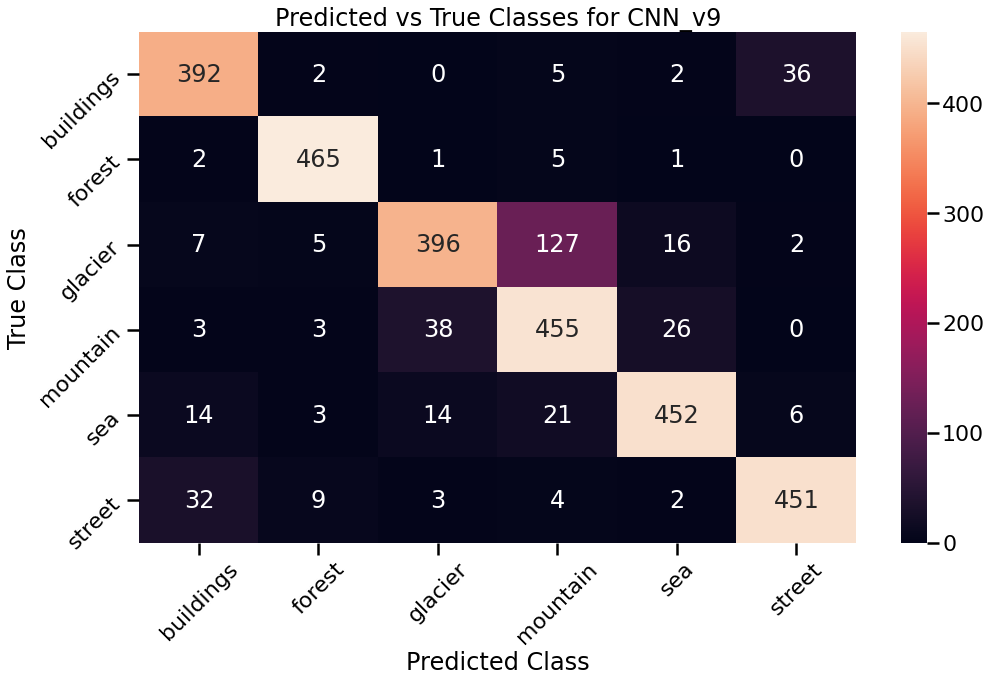

In [32]:
load_evaluate_model('CNN_v9', X_test, y_test, labels)